In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\monthly-milk-production-pounds.csv")
data.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
data.drop(168,axis=0,inplace=True)

In [6]:
data.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     168 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [8]:
data["Month"]=pd.to_datetime(data["Month"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Month                                                     168 non-null    datetime64[ns]
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [10]:
data=data.set_index("Month")

In [11]:
data.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


<AxesSubplot:xlabel='Month'>

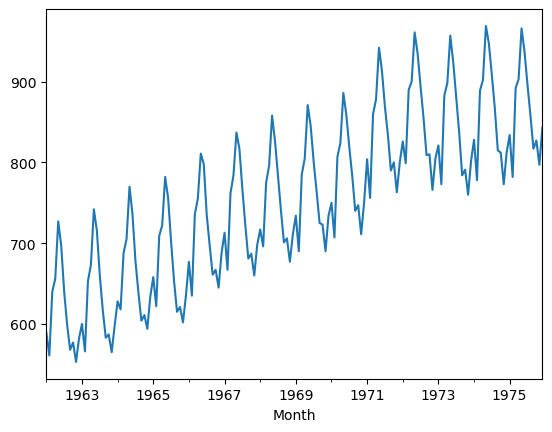

In [12]:
data["Monthly milk production: pounds per cow. Jan 62 ? Dec 75"].plot()

In [13]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data)
print(f"Adf Statistics:{result[0]}")
print(f"p_value:{result[1]}")
print(f"n_lags:{result[2]}")
if result[1]>0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")
    
      

Adf Statistics:-1.3038115874221243
p_value:0.6274267086030341
n_lags:13
Series is not stationary


In [23]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data)

KPSS Statistic: 1.8429827891686164
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


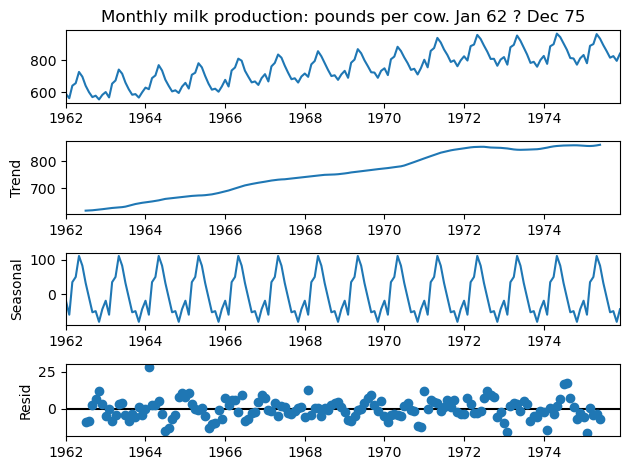

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data["Monthly milk production: pounds per cow. Jan 62 ? Dec 75"])
decomposition.plot();

#Rolling Statistics -

#Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and #perform calculations on the data in this window which, of course, rolls through the data.

In [26]:
mean_log=data.rolling(window=12).mean()
std_log=data.rolling(window=12).std()

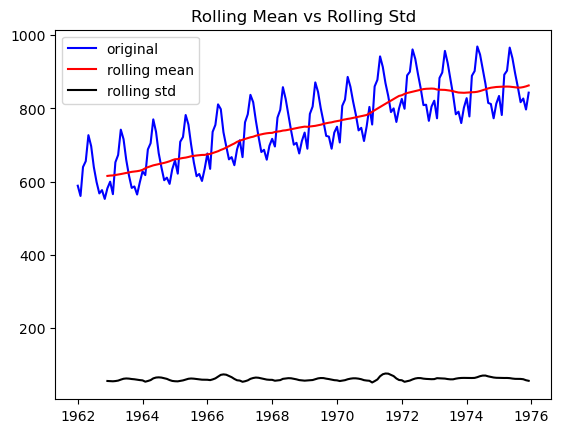

In [27]:
plt.plot(data,color="blue",label="original")
plt.plot(mean_log,color="red",label="rolling mean")
plt.plot(std_log,color="black",label="rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean vs Rolling Std")
plt.show()

In [31]:
#transformation
first_log=np.log(data)
first_log=first_log.dropna()
first_log

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01-01,6.378426
1962-02-01,6.329721
1962-03-01,6.461468
1962-04-01,6.486161
1962-05-01,6.588926
...,...
1975-08-01,6.754604
1975-09-01,6.705639
1975-10-01,6.717805


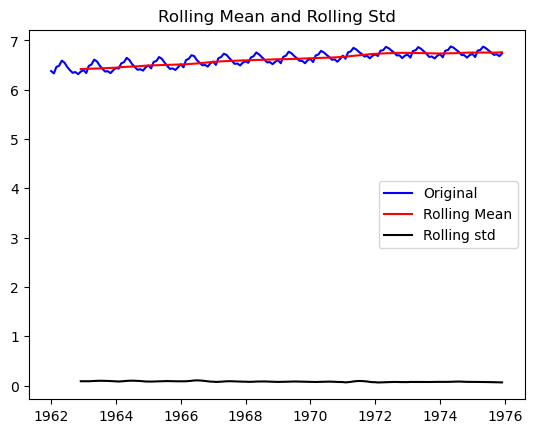

In [32]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

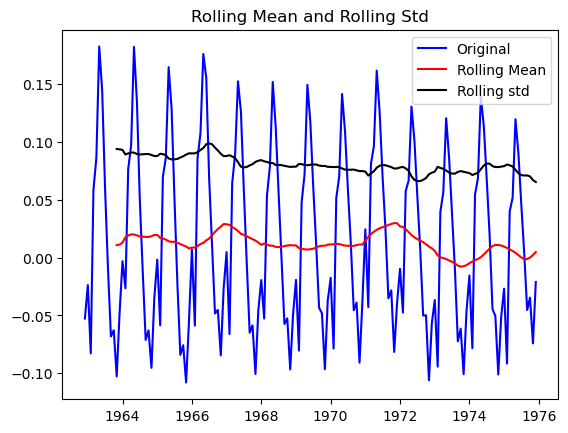

In [33]:
new_data = first_log - mean_log
new_data = new_data.dropna()
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(new_data)
print(f"Adf Statistics:{result[0]}")
print(f"p_value:{result[1]}")
print(f"n_lags:{result[2]}")
if result[1]>0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")
    
      

Adf Statistics:-3.3210112149436664
p_value:0.013965001618372847
n_lags:13
Series is stationary


In [38]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(new_data)

KPSS Statistic: 0.04328116274505673
p-value: 0.1
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


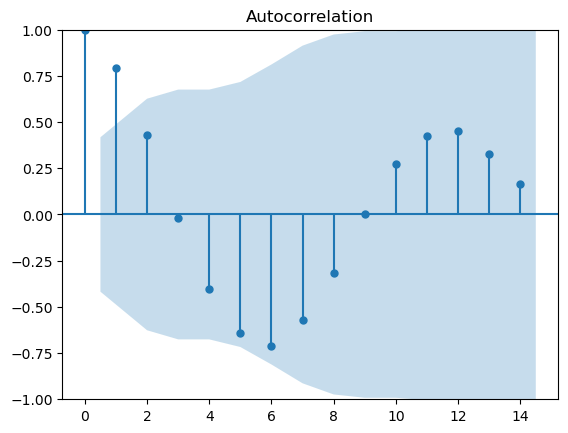

In [41]:
# Model Building
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(new_data.dropna())
plot_acf(acf_plot);

C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


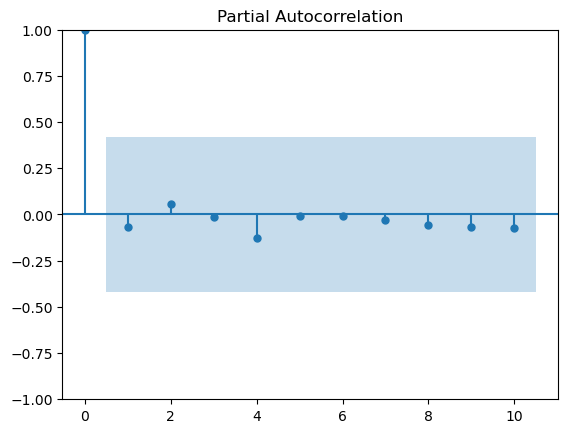

In [42]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(new_data.dropna())
plot_pacf(pacf_plot,lags=10);


In [45]:
train=new_data.iloc[120:]["Monthly milk production: pounds per cow. Jan 62 ? Dec 75"]
test=new_data.iloc[:121]["Monthly milk production: pounds per cow. Jan 62 ? Dec 75"]
from statsmodels.tsa.arima.model import ARIMA

In [46]:
model=ARIMA(train,order=(1,0,2))
model_fit=model.fit()

C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

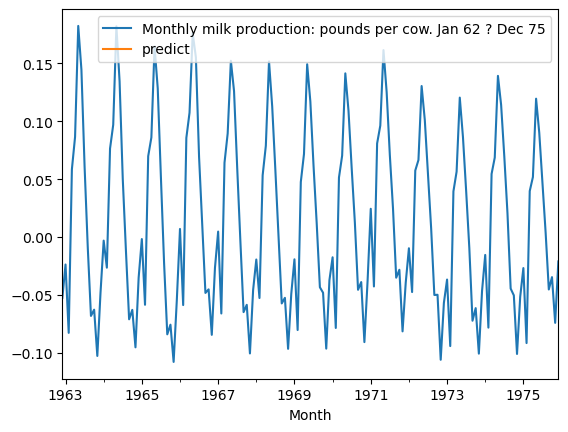

In [47]:
new_data["predict"]=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
new_data[["Monthly milk production: pounds per cow. Jan 62 ? Dec 75","predict"]].plot()

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
model=model.fit()

C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\souvi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

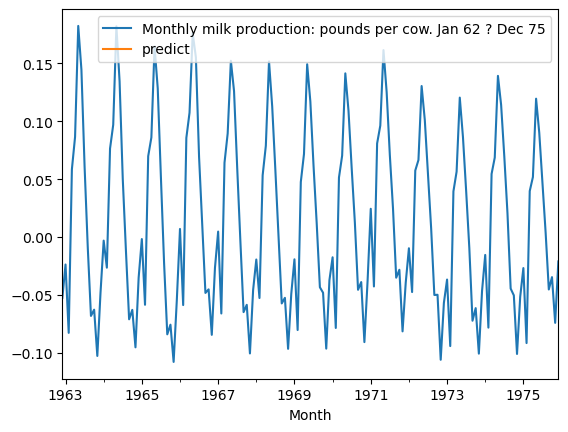

In [49]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[["Monthly milk production: pounds per cow. Jan 62 ? Dec 75","predict"]].plot()

<AxesSubplot:xlabel='Month'>

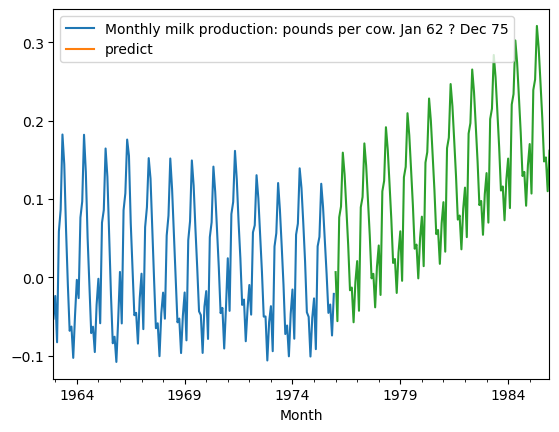

In [50]:
forecast = model.forecast(steps=120) #for predicting furture
new_data.plot()
forecast.plot()